# Explanatory Data Analysis 2

In [1]:
# Importing Libraries

import numpy as np                  #used for mathematical functions, dealing with arrays, linear algebra etc.
import pandas as pd                 #to read and explore ,data manipulation, data visualization.
import matplotlib.pyplot as plt      #data visualization
import seaborn as sns                #data visualization

In [2]:
#read csv file data using pandas 
boston= pd.read_csv('D:\DATA SCIENCE\Odin schools\EDAb\\bostondata.csv')
boston.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"



Data consists of Online Purchased electronic products which are delivered to respective address. The data has 6 variables which consists customer transaction details like Order ID, Product, Quantity Ordered,Price Each, Order Date, Purchase Address. The data has 372610 with 20 different electronic products.

In [3]:
#some basic information about data
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
# no of unique values in each coloumn
boston.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [5]:
# Each unique product in the data
boston['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [6]:
#Calculating null values
boston.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [7]:
#shape of the data
boston.shape

(373700, 6)

We have 6 columns in the data with equal size.All the columns in the data are in object type and has same number of rows i.e 372610. 
Order ID is customer permanent ID for the transactions in store, we can identify with the number of unique values that few Order ID's have repeated transactions. 
Product : We have 20 different electronic products which are given in above result. 
Quantity : No of products purchased in a transaction.
Price: Price Of each product purchased in a transaction.
Order date: Date of order for a transaction.
Purchase Address : Customer addresss where the product has to be delivered.

Null Values
All the columns contain equal number of null values.

# Data Cleaning

In [8]:
# Percentage of null Values

(boston.isnull().sum().sum())/len(boston)*100 

1.75006689858175

As the null values are less than 2 % we can remove these for our analysis, as the data is large enough.

In [9]:
# removing null values and storing the data in df variable.
df=boston.dropna()
df.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
#Renaming Columns 
df.rename(columns = {'Order Date':'Odate','Quantity Ordered': 'Quantity', 'Purchase Address':'Address', 'Price Each': 'Price'}, inplace = True)


C:\Users\chinna\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
# trying to convert to integer type but occured an error which says data contains 'Quanity Ordered' as a string value in Quantity column.
#df['Quantity']=pd.to_numeric(df['Quantity'], errors='raise')


In [12]:
#Excluding 'Quantity Ordered' string in Quantity column along with respective rows with the same index. Since Column names are repeated. 
df = df[df['Quantity'] != "Quantity Ordered"] 


In [13]:
#Converting columns to respective data type
df['Quantity']=pd.to_numeric(df['Quantity'], errors='raise')     #integer type , raise argument will raise the errors if any.
df['Odate']=pd.to_datetime(df['Odate'], errors='coerce')         #datatime type, coerce will convert the other than datetime values to NA values
df['Price']=pd.to_numeric(df['Price'], errors='raise')          # float type


In [14]:
#dropping the values with same repeating rows. 
df=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False) #keep first keeps the first row and removes other duplicates.

In [15]:
#Shape of the data
df.shape

(185686, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Order ID  185686 non-null  object        
 1   Product   185686 non-null  object        
 2   Quantity  185686 non-null  int64         
 3   Price     185686 non-null  float64       
 4   Odate     185686 non-null  datetime64[ns]
 5   Address   185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 7.8+ MB


Now, the data reduced to 185686 rows with 6 columns and we have converted columns to respective data type,dropped the values with same repeating rows(duplicate values).Excluded the columns which are not required ,removed null values in the data and renamed the columns for our convince.

In [17]:
#Statistical description of the data 
df.describe()

,Quantity,Price
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [18]:
#Splitting address into 3 columns
df[['street','City','Pincode']] = df['Address'].apply(
   lambda x: pd.Series(str(x).split(",")))
   

In [19]:
#First two columns of df
df.head(2)

,Order ID,Product,Quantity,Price,Odate,Address,street,City,Pincode
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035


In [20]:
# Unique cities in our data
df['City'].unique()

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

In [21]:
#Extracting Day of week where :
#0 - Monday ,1 - Tuesday ,2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday, 6 - Sunday
df['Weekday']=df['Odate'].dt.dayofweek

In [22]:
#Extracting month from Odate
# 1- January ......12 - December
df['Month']=df['Odate'].dt.month

In [23]:
# Extracting Year
df['Year']=df['Odate'].dt.year

In [24]:
#Extracting hour
df['hour']=df['Odate'].dt.hour

In [25]:
# Calculating the amount_spent by a customer in a transaction
df['Amount_Spent']=df['Quantity']*df['Price']

In [26]:
# Removing variables which are not required for this analysis
df.drop(['Address','street','Odate'],axis=1,inplace=True)

In [27]:
#Cleaned data
df.head()

,Order ID,Product,Quantity,Price,City,Pincode,Weekday,Month,Year,hour,Amount_Spent
0,141234,iPhone,1,700.00,Boston,MA 02215,1,1,2019,21,700.00
1,141235,Lightning Charging Cable,1,14.95,Portland,OR 97035,0,1,2019,14,14.95
2,141236,Wired Headphones,2,11.99,San Francisco,CA 94016,3,1,2019,13,23.98
3,141237,27in FHD Monitor,1,149.99,Los Angeles,CA 90001,5,1,2019,20,149.99
4,141238,Wired Headphones,1,11.99,Austin,TX 73301,4,1,2019,11,11.99


In [28]:
# Comparing the data given to cleaned data.
boston.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [29]:
# Statistical Description of data given 
boston.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610,372610,372610,372610
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806,710,710


In [30]:
#statistical description of data cleaned
df.describe()

,Quantity,Price,Weekday,Month,Year,hour,Amount_Spent
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,2.991588,7.058653,2019.000183,14.412934,185.611936
std,0.443069,332.843838,2.002009,3.502932,0.013530,5.423329,333.032118
min,1.000000,2.990000,0.000000,1.000000,2019.000000,0.000000,2.990000
25%,1.000000,11.950000,1.000000,4.000000,2019.000000,11.000000,11.950000
50%,1.000000,14.950000,3.000000,7.000000,2019.000000,15.000000,14.950000
75%,1.000000,150.000000,5.000000,10.000000,2019.000000,19.000000,150.000000
max,9.000000,1700.000000,6.000000,12.000000,2020.000000,23.000000,3400.000000


Here the maximum price and the 75th percentile of Price column has a large difference. So, we need to check if it is an outlier.

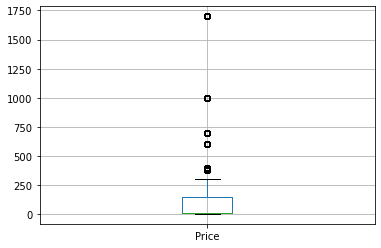

In [31]:
#boxplot to check oultier
df.boxplot(column=['Price'])

In [32]:
#Largest numbers w.rt Price 
df.nlargest(5, ['Price'])

,Order ID,Product,Quantity,Price,City,Pincode,Weekday,Month,Year,hour,Amount_Spent
11,141245,Macbook Pro Laptop,1,1700.0,San Francisco,CA 94016,3,1,2019,10,1700.0
55,141288,Macbook Pro Laptop,1,1700.0,Los Angeles,CA 90001,5,1,2019,8,1700.0
82,141314,Macbook Pro Laptop,1,1700.0,New York City,NY 10001,6,1,2019,23,1700.0
128,141360,Macbook Pro Laptop,1,1700.0,Los Angeles,CA 90001,3,1,2019,21,1700.0
155,141385,Macbook Pro Laptop,1,1700.0,Atlanta,GA 30301,3,1,2019,12,1700.0


Here Macbook Pro Laptop costs 1700 , So it's not an outlier.

# 4.What is the distribution of sales among different cities in different months?

In [33]:
#sum of amount spent for each month every city using groupby.
df.groupby(['City','Month'])['Amount_Spent'].sum().to_frame()

Amount_Spent
City     Month              
 Atlanta 1         149159.54
         2         176458.31
         3         231605.38
         4         284422.01
         5         238842.00
...                      ...
 Seattle 8         189335.10
         9         156369.27
         10        316841.32
         11        252068.18
         12        386005.95

[108 rows x 1 columns]

In [34]:
#storing it to city sales variable
city_sales= df.groupby(['City','Month'])['Amount_Spent'].sum().to_frame()

In [35]:
#Groupby function will give result in array, so here we are converting array to column by reseting index
city_sales=city_sales.reset_index()

# 4. What is the distribution of sales among different cities in different months?

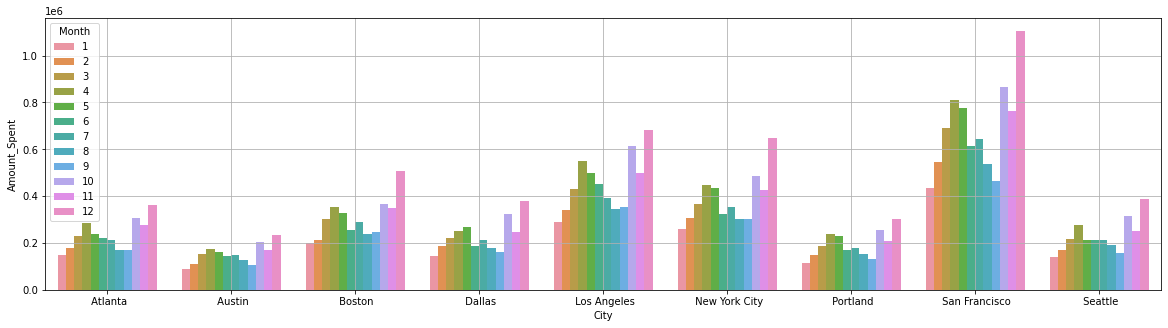

In [36]:
#4. What is the distribution of sales among different cities in different months?

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="City", y="Amount_Spent", data=city_sales,hue='Month')
plt.grid()

Clearly San Francisco has highest sales amoung all the cities in the month of december.

# Which city had the highest sales overall? 

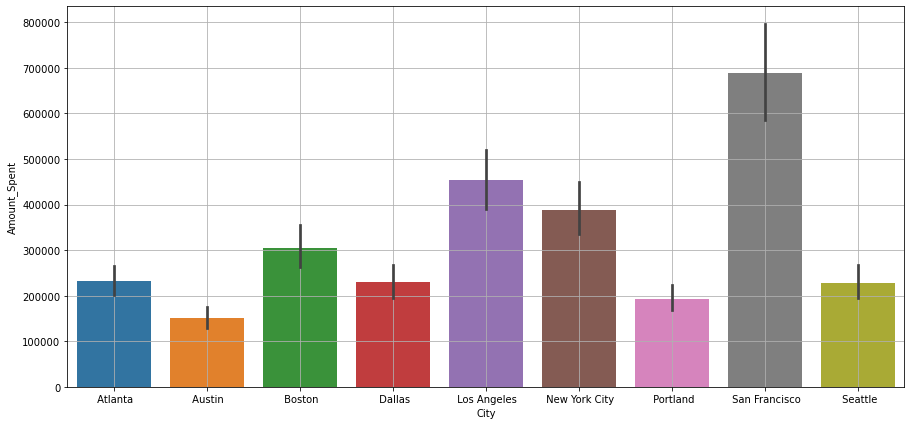

In [37]:
#Which city had the highest sales overall?

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="City", y="Amount_Spent", data=city_sales)
plt.grid()

San Francisco has highest sales overall.

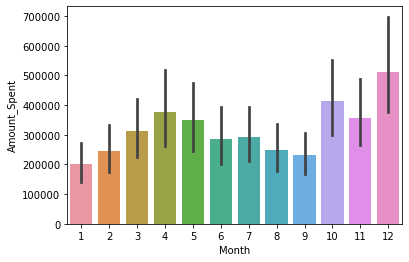

In [38]:
#Which Month had the highest amount of sales overall?
sns.barplot(x="Month", y="Amount_Spent", data=city_sales)


Decemeber month has highest sales .

# Most bought products per city.

In [39]:
# grouby and store in Product_sold
Product_sold=df.groupby(['City','Product'])['Quantity'].sum().to_frame()

In [40]:
#Groupby function will give result in array, so here we are converting array to column by reseting index
Product_sold=Product_sold.reset_index()

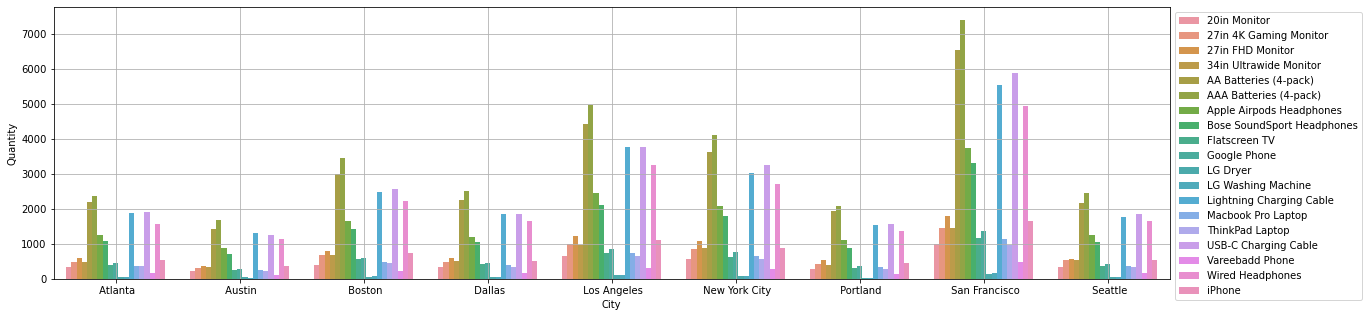

In [41]:
# Bar plot of City & Quantity w.r.t Product
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="City", y="Quantity", data=Product_sold,hue='Product')
plt.grid()
plt.legend(loc = 2, bbox_to_anchor = (1,1))


AAA batteries are most bought products in every city. 

According to the above observation of the plots, San Francisco can be best city  for establishing a new branch for the retail store because it has highest sales. 

# Distribution of sales over different times of the day (Morning, Afternoon, Evening, Night)

In [42]:
#unique hours starting from 0 to 23
df['hour'].unique()

array([21, 14, 13, 20, 11, 12, 10, 18, 19, 17,  8,  9,  0, 22, 23, 16,  7,
       15,  1,  2,  5,  6,  3,  4], dtype=int64)

In [43]:
#defining a function to break a day into 6 sessions/periods using elif condition.
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    if (x > 8) and (x<=12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

df['session'] = df['hour'].apply(f)
df.head()

,Order ID,Product,Quantity,Price,City,Pincode,Weekday,Month,Year,hour,Amount_Spent,session
0,141234,iPhone,1,700.00,Boston,MA 02215,1,1,2019,21,700.00,Night
1,141235,Lightning Charging Cable,1,14.95,Portland,OR 97035,0,1,2019,14,14.95,Noon
2,141236,Wired Headphones,2,11.99,San Francisco,CA 94016,3,1,2019,13,23.98,Noon
3,141237,27in FHD Monitor,1,149.99,Los Angeles,CA 90001,5,1,2019,20,149.99,Eve
4,141238,Wired Headphones,1,11.99,Austin,TX 73301,4,1,2019,11,11.99,Morning


Now, we have Day divided into Early morning : between 4 and 8, Morning: between 12 and 16, Noon: between 12 and 16, Evening: 16 and 20 , Night: between  20 and 24, Late night: 0 and 4
                            

In [44]:
#Sum of quantity w.r.t session using group by and stored in dist_session
dist_session=df.groupby(['session'])['Quantity'].sum().to_frame()

#Groupby function will give result in array, so here we are converting array to column by reseting index
dist_session=dist_session.reset_index()

Sales=dist_session.Quantity  
Session=dist_session.session

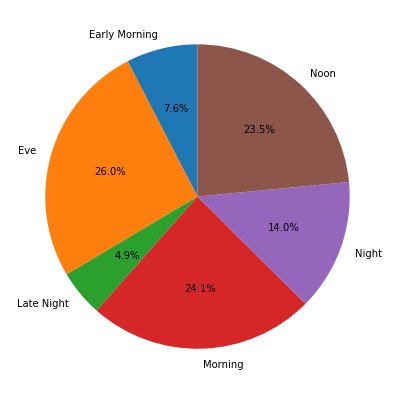

In [45]:
#Find out the distribution of sales over different times of the day & 
# Which time of day has the most sales?


fig = plt.figure(figsize =(10, 7))

plt.pie(Sales, autopct='%1.1f%%',labels = Session, startangle=90)  #autopct is for annotation, starangle is angle of plot
plt.show()


The pie chart shows high sales are happening in the evening. We can also observe that from Morning 8am to 4pm , the sales are good enough.  

In [46]:
# Sum of Quantity w.r.t Product for each session using groupby
session_sales= df.groupby(['session','Product'])['Quantity'].sum().to_frame()

In [47]:
#Groupby function will give result in array, so here we are converting array to column by reseting index
session_sales=session_sales.reset_index()

# What products are mostly sold at different times of the day?

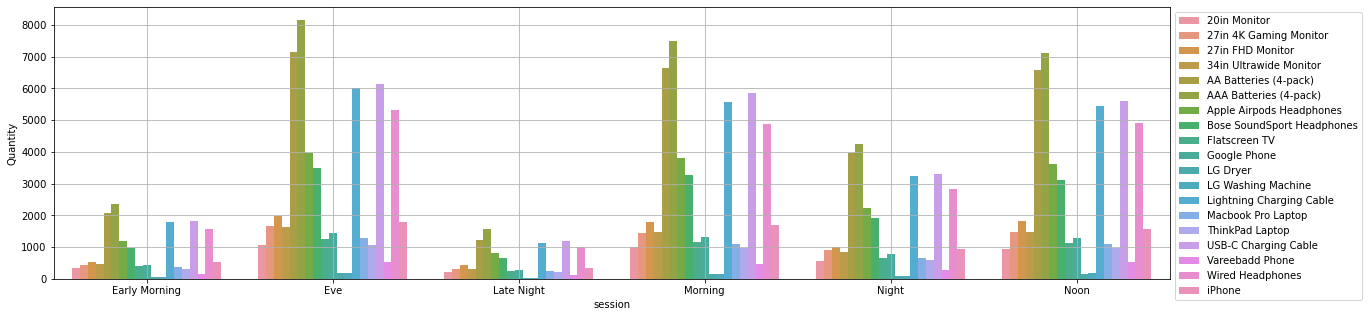

In [48]:
#What products are mostly sold at different times of the day?
plt.subplots(figsize=(20,5))
sns.barplot(x="session", y="Quantity", data=session_sales,hue='Product')
plt.grid()
plt.legend(loc = 2, bbox_to_anchor = (1,1)) #for labeling the products


AAA batterires (4-pack) are highly sold at any time of the day than any other product.


 The best working hours are between 8am to Evening 8pm and the best products for the retail stores in each city are AAA batteries and AA battries of 4 pack according to the observation from above plots

# Which two products are bought together ?


Market basket Analysis

In [49]:
#slicing the first 3 cloumns for this analysis
df_MBA=df.iloc[:,:3]

In [50]:
#pip install mlxtend --no-deps

In [51]:
#sum of Quantity w.r.t Product for each order ID . Creating level of columns with pivoted index labels and changing the index of df to Order ID
df2=df_MBA.groupby(['Order ID','Product'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID')
df2

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
141237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
319667,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
#Encoding the data , if Product is bought returned as 1 else 0
def encode(x):
    if x < 1:
        return 0
    if x >= 0:
        return 1
basket_encode= df2.applymap(encode)
basket_encode

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
141235,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
141236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
141237,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
319667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Since the analysis is to uncover the association of two or more items. The values which are less two in Quantity will not be helpful for this analysis, we need to select the values which are atleast 2. 

In [53]:
#Selecting the values which are greater than 2
basket_encode= basket_encode[(basket_encode>0 ).sum(axis=1)>=2]
basket_encode

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
141290,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
141365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
141384,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
141450,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319536,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
319556,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
319584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


Here we can see 6832 times items are bought together

In [54]:
#installing mxlend from preferred installer program
#pip install mlxtend 

Apriori algorithm :used to find the frequently bought items in the dataset.

In [68]:
# import apriori function which gives frequently bought products 
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket_encode, min_support=0.03, use_colnames=True).sort_values('support',ascending= False).reset_index(drop= True)

frequent_itemsets

,support,itemsets
0,0.295228,(USB-C Charging Cable)
1,0.272834,(iPhone)
2,0.252049,(Lightning Charging Cable)
3,0.239022,(Google Phone)
4,0.234924,(Wired Headphones)
5,0.147980,"(Lightning Charging Cable, iPhone)"
6,0.145931,"(Google Phone, USB-C Charging Cable)"
7,0.135539,(Apple Airpods Headphones)
8,0.112119,(Bose SoundSport Headphones)
9,0.105240,(AAA Batteries (4-pack))


 It is shown in the table that USB-C Charging Cable is the most frequently bought items with the support value of 0.295228. It means the item is frequently bought  out of the whole transaction.

In [69]:
#using association rules we are finding products which are bought together.
from mlxtend.frequent_patterns import association_rules
df_final=association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift',ascending= False).reset_index(drop=True)

In [70]:
df_final

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Lightning Charging Cable),(iPhone),0.252049,0.272834,0.147980,0.587108,2.151889,0.079213,1.761154
1,(iPhone),(Lightning Charging Cable),0.272834,0.252049,0.147980,0.542382,2.151889,0.079213,1.634444
2,(Vareebadd Phone),(USB-C Charging Cable),0.087968,0.295228,0.053864,0.612313,2.074031,0.027893,1.817887
3,(USB-C Charging Cable),(Vareebadd Phone),0.295228,0.087968,0.053864,0.182449,2.074031,0.027893,1.115566
4,(Google Phone),(USB-C Charging Cable),0.239022,0.295228,0.145931,0.610533,2.068002,0.075365,1.809579
5,(USB-C Charging Cable),(Google Phone),0.295228,0.239022,0.145931,0.494298,2.068002,0.075365,1.504796
6,(Apple Airpods Headphones),(iPhone),0.135539,0.272834,0.054596,0.402808,1.476386,0.017617,1.217642
7,(iPhone),(Apple Airpods Headphones),0.272834,0.135539,0.054596,0.200107,1.476386,0.017617,1.080722
8,(Google Phone),(Bose SoundSport Headphones),0.239022,0.112119,0.033372,0.139620,1.245282,0.006573,1.031964
9,(Bose SoundSport Headphones),(Google Phone),0.112119,0.239022,0.033372,0.297650,1.245282,0.006573,1.083474


antecedents are If Item A is bought then item B Consequents are bought.

lift: lift indicates the strength of a rule over the random occurrences of A & B

Here we can observe

1. iPhone and Lightning Charging Cable are most frequently bought together

And these products are bought together.
2.	(Vareebadd Phone)	(USB-C Charging Cable)	
3.	(Google Phone)	(USB-C Charging Cable)
4. (iPhone)	(Apple Airpods Headphones)
5. (Google Phone)	(Bose SoundSport Headphones)
6. (Google Phone)	(Wired Headphones)	
7. (iPhone)	(Wired Headphones)	